Data Wrangling II 
Create an “Academic performance” dataset of students and perform the following operations using 
Python. 
 
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
the skewness and convert the distribution into a normal distribution. 
 
Reason and document your approach properly. 

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#creating dataset
data = {
    'student ID' : [ 1,2,3,4,5],
    'age' : [18,23,np.NaN, 19,20],
    'gender' : ['male','female', 'female','male','male'],
    'exam score' : [90,85,75,95,65],
    'study hours': [4,6,8,np.NAN, 5],
    'attendance percentage' :[80,95,85,70,60]
}


In [ ]:
#create a dataframe
df = pd.DataFrame(data)
df

,student ID,age,gender,exam score,study hours,attendance percentage
0,1,18.0,male,90,4.0,80
1,2,23.0,female,85,6.0,95
2,3,NaN,female,75,8.0,85
3,4,19.0,male,95,NaN,70
4,5,20.0,male,65,5.0,60


In [ ]:
#check null values
df.isnull().sum()

,0
student ID,0
age,1
gender,0
exam score,0
study hours,1
attendance percentage,0


In [ ]:
#mean of age column
age_mean = df['age'].mean()

In [ ]:
#replace null values with mean
df['age'] = df['age'].replace(np.NaN ,age_mean )

In [ ]:
df.isnull().sum()

,0
student ID,0
age,0
gender,0
exam score,0
study hours,0
attendance percentage,0


In [ ]:
#mean of column study_hours
study_hour_mean = df['study hours'].mean()

In [ ]:
#assign mean values to null values
df['study hours'] = df['study hours'].replace(np.NaN ,study_hour_mean )

In [ ]:
#check whether null values are replace or not
df

,student ID,age,gender,exam score,study hours,attendance percentage
0,1,18.0,male,90,4.00,80
1,2,23.0,female,85,6.00,95
2,3,20.0,female,75,8.00,85
3,4,19.0,male,95,5.75,70
4,5,20.0,male,65,5.00,60


Replace null values with median

In [ ]:
#creating a dataset
dataset = {
    'student ID' : [ 1,2,3,4,5],
    'age' : [18,23,np.NaN, 19,20],
    'gender' : ['male','female', 'female','male','male'],
    'exam score' : [90,85,75,95,65],
    'study hours': [4,6,8,np.NAN, 5],
    'attendance percentage' :[80,95,85,70,60]
}


In [ ]:
#creating a dataframe
df_score = pd.DataFrame(dataset)
df_score

,student ID,age,gender,exam score,study hours,attendance percentage
0,1,18.0,male,90,4.0,80
1,2,23.0,female,85,6.0,95
2,3,NaN,female,75,8.0,85
3,4,19.0,male,95,NaN,70
4,5,20.0,male,65,5.0,60


In [ ]:
#find null values
df_score.isnull().sum()

,0
student ID,0
age,0
gender,0
exam score,0
study hours,0
attendance percentage,0


In [ ]:
#find median of age column
age_median = df['age'].median()

In [ ]:
#replace median with null values
df_score['age'] = df_score['age'].replace(np.NaN ,age_median )

In [ ]:
#find median of study hours
study_hours_median = df['study hours'].median()

In [ ]:
#replace median with null values
df_score['study hours'] = df_score['study hours'].replace(np.NaN ,study_hours_median )

In [ ]:
#check dataframe where null values replace with median
df_score

,student ID,age,gender,exam score,study hours,attendance percentage
0,1,18.0,male,90,4.00,80
1,2,23.0,female,85,6.00,95
2,3,20.0,female,75,8.00,85
3,4,19.0,male,95,5.75,70
4,5,20.0,male,65,5.00,60


In [ ]:
#check dataframe where null values replace with mean
df

,student ID,age,gender,exam score,study hours,attendance percentage
0,1,18.0,male,90,4.00,80
1,2,23.0,female,85,6.00,95
2,3,20.0,female,75,8.00,85
3,4,19.0,male,95,5.75,70
4,5,20.0,male,65,5.00,60


In [ ]:
#mean of age column
age_mean

20.0

In [ ]:
#get median of age column
age_median

20.0

In [ ]:
#get median of study hours column
study_hours_median

5.75

In [ ]:
#get mean of study hours column
study_hour_mean

5.75

In [ ]:
# Plotting boxplots for numerical columns (age, salary)
numerical_columns = ['age', 'study hours', 'attendance percentage','exam score']

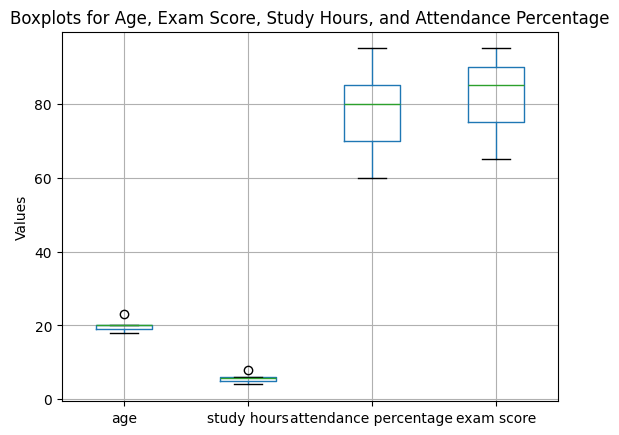

In [ ]:
# Create a boxplot for each numerical column
df[numerical_columns].boxplot()

# Display the plot
plt.title('Boxplots for Age, Exam Score, Study Hours, and Attendance Percentage')
plt.ylabel('Values')
plt.show()


Create a new dataframe which includes outliers

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Sample Data
data = {'value': [10, 12, 12, 13, 15, 18, 100, 20, 21, 25]}
df1 = pd.DataFrame(data)

# Z-Score Method
z_scores = np.abs(stats.zscore(df1['value']))
threshold = 1  # Usually, a threshold of 3 is used
df_no_outliers = df1[z_scores < threshold]

print("Original Data:")
print(df1)



Original Data:
   value
0     10
1     12
2     12
3     13
4     15
5     18
6    100
7     20
8     21
9     25


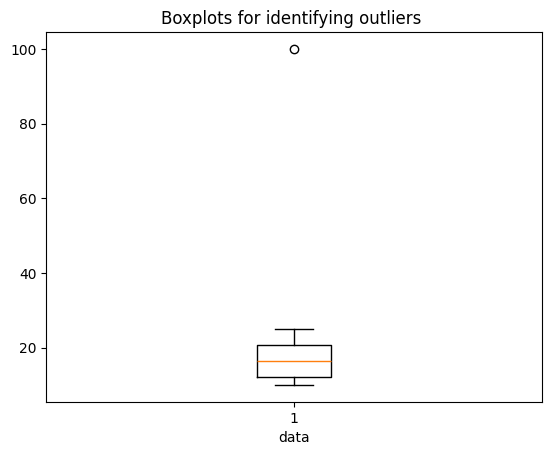

In [ ]:
import matplotlib.pyplot as plt


# Display the plot
plt.boxplot(df1['value'])
plt.title('Boxplots for identifying outliers ')
plt.xlabel('data')
plt.show()

In [ ]:
# Replace outliers with the median value of the column
median_value = df1['value'].median()
print('median value is :',median_value)
df1['value'] = np.where(z_scores > threshold, median_value, df1['value'])

print("\n\nData with Imputed Outliers (Replaced with Median):")
print(df1)


median value is : 16.5


Data with Imputed Outliers (Replaced with Median):
   value
0   10.0
1   12.0
2   12.0
3   13.0
4   15.0
5   18.0
6   16.5
7   20.0
8   21.0
9   25.0


In [ ]:
# Apply log transformation (log(x + 1) to handle zero values if present)
df1['log_value'] = np.log(df1['value'] + 1)

# Display the transformed data
print("Original Data:")
print(df1['value'])

print("\nLog Transformed Data:")
print(df1['log_value'])

Original Data:
0     10
1     12
2     12
3     13
4     15
5     18
6    100
7     20
8     21
9     25
Name: value, dtype: int64

Log Transformed Data:
0    2.397895
1    2.564949
2    2.564949
3    2.639057
4    2.772589
5    2.944439
6    4.615121
7    3.044522
8    3.091042
9    3.258097
Name: log_value, dtype: float64


In [ ]:
import pandas as pd

# Sample DataFrame
data = {'value': [10, 12, 12, 13, 15, 18, 100, 20, 21, 25]}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]

print("Outliers based on IQR Method:")
print(outliers)


Outliers based on IQR Method:
   value
6    100


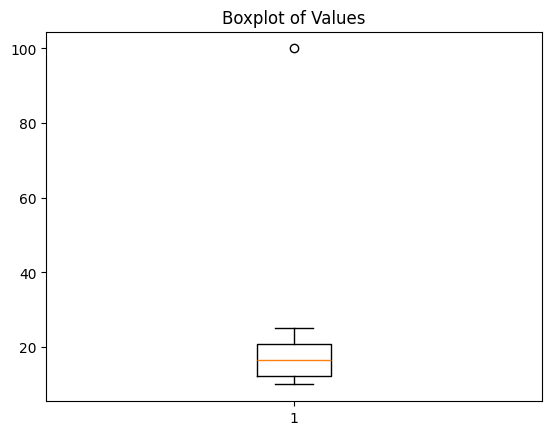

In [ ]:
plt.boxplot(df['value'])
plt.title('Boxplot of Values')
plt.show()

In [ ]:
student_score = pd.read_csv('/content/student-scores.csv')

In [ ]:
student_score

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75
